Проведём эксплораторный анализ по данным эксплуатации скважин
![](https://www.gazprom-neft.ru/img/sibneft/126p/22.png)

Набор данных содержит данные по 7 скважинам (добывающие скважины и нагнетательные скважины). 
Изображение выше представлено для справки.

Анализ будет состоять из нескольких этапов.

Данные использованы с сайта [https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html)

## 1) ASK:

Проанализировать данные о добыче добывающих скважин на месторождении, чтобы получить представление о различиях между добывающими скважинами, а также выявить скважины с самой высокой добычей и истощающиеся скважины.

Анализ должен включать 
* Описание используемых данных
* Комментарии с какими-либо преобразованиями или фильтрациями данных
* Краткое изложение проведённого анализа
* Визуализации данных и выводов

In [231]:
# импортируем требуемые библиотеки 
import pandas as pd # работа с данными
from matplotlib import pyplot as plt # базовая библиотека для визуализации
import seaborn as sns # основная библиотека для визуализации
import plotly.express as px # интерактивные графики
import openpyxl # чтение/запись эксель
%matplotlib inline
plt.figure(figsize=(12, 9), dpi=80)
sns.set(rc={'figure.figsize':(10,8)})

<Figure size 960x720 with 0 Axes>

## (2) Prepare 

In [232]:
# прочитаем эксель-файл с данными
df_production = pd.read_excel('Volve production data.xlsx')

# Посмотрим, какие данные имеются

In [233]:
df_production

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME   
0     2014-04-07   NO 15/9-F-1 C                7405         15/9-F-1 C  \
1     2014-04-08   NO 15/9-F-1 C                7405         15/9-F-1 C   
2     2014-04-09   NO 15/9-F-1 C                7405         15/9-F-1 C   
3     2014-04-10   NO 15/9-F-1 C                7405         15/9-F-1 C   
4     2014-04-11   NO 15/9-F-1 C                7405         15/9-F-1 C   
...          ...             ...                 ...                ...   
15629 2016-09-14  NO 15/9-F-5 AH                5769           15/9-F-5   
15630 2016-09-15  NO 15/9-F-5 AH                5769           15/9-F-5   
15631 2016-09-16  NO 15/9-F-5 AH                5769           15/9-F-5   
15632 2016-09-17  NO 15/9-F-5 AH                5769           15/9-F-5   
15633 2016-09-18  NO 15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME   
0             3420717          VOLVE             369304    MÆRSK INSPIRER  \
1             3420717          VOLVE             369304    MÆRSK INSPIRER   
2             3420717          VOLVE             369304    MÆRSK INSPIRER   
3             3420717          VOLVE             369304    MÆRSK INSPIRER   
4             3420717          VOLVE             369304    MÆRSK INSPIRER   
...               ...            ...                ...               ...   
15629         3420717          VOLVE             369304    MÆRSK INSPIRER   
15630         3420717          VOLVE             369304    MÆRSK INSPIRER   
15631         3420717          VOLVE             369304    MÆRSK INSPIRER   
15632         3420717          VOLVE             369304    MÆRSK INSPIRER   
15633         3420717          VOLVE             369304    MÆRSK INSPIRER   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P   
0                0.0                0.00000  ...              %    0.00000  \
1                0.0                    NaN  ...              %    0.00000   
2                0.0                    NaN  ...              %    0.00000   
3                0.0                    NaN  ...              %    0.00000   
4                0.0              310.37614  ...              %   33.09788   
...              ...                    ...  ...            ...        ...   
15629            0.0                    NaN  ...              %    0.07776   
15630            0.0                    NaN  ...              %    0.08545   
15631            0.0                    NaN  ...              %    0.08544   
15632            0.0                    NaN  ...              %    0.07497   
15633            0.0                    NaN  ...            NaN        NaN   

       AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   
0        0.00000        0.00000          0.0           0.0           0.0  \
1        0.00000        0.00000          0.0           0.0           0.0   
2        0.00000        0.00000          0.0           0.0           0.0   
3        0.00000        0.00000          0.0           0.0           0.0   
4       10.47992       33.07195          0.0           0.0           0.0   
...          ...            ...          ...           ...           ...   
15629    0.22879        0.01862          0.0           0.0           0.0   
15630    0.22914        0.00631          0.0           0.0           0.0   
15631    0.22896        0.01181          0.0           0.0           0.0   
15632    0.22846        0.02576          0.0           0.0           0.0   
15633        NaN        0.00000          NaN           NaN           NaN   

       BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0              NaN  production         WI  
1              NaN  production         OP  
2              NaN  production         OP  
3              NaN  production         OP  
4              NaN  production         OP  
...            ...         ...        ...  
15629          NaN  produ

In [234]:
df_production.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

Имеем 24 столбцов данных

Пример полезных для нас столбцов:

DATEPRD : столбец с датой

NPD_WELL_BORE_CODE : уникальный идентификатор скважины

BORE_OIL_VOL : объём добытой нефти

BORE_GAS_VOL : объём добытого газа

WELL_TYPE : тип скважины (нагнет. или доб.)

In [235]:
# краткое описание данных
df_production.describe()

DATEPRD  NPD_WELL_BORE_CODE  NPD_FIELD_CODE   
count                          15634        15634.000000         15634.0  \
mean   2012-11-07 17:39:58.004349440         5908.581745       3420717.0   
min              2007-09-01 00:00:00         5351.000000       3420717.0   
25%              2010-07-30 00:00:00         5599.000000       3420717.0   
50%              2013-05-08 00:00:00         5693.000000       3420717.0   
75%              2015-02-19 00:00:00         5769.000000       3420717.0   
max              2016-12-01 00:00:00         7405.000000       3420717.0   
std                              NaN          649.231622             0.0   

       NPD_FACILITY_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE   
count            15634.0   15349.000000            8980.000000  \
mean            369304.0      19.994093             181.803869   
min             369304.0       0.000000               0.000000   
25%             369304.0      24.000000               0.000000   
50%             369304.0      24.000000             232.896939   
75%             369304.0      24.000000             255.401455   
max             369304.0      25.000000             397.588550   
std                  0.0       8.369978             109.712363   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS   
count               8980.000000    8980.000000        7890.000000  \
mean                  77.162969     154.028787          14.856100   
min                    0.000000       0.000000           0.000000   
25%                    0.000000      83.665361          10.841437   
50%                  103.186689     175.588861          16.308598   
75%                  106.276591     204.319964          21.306125   
max                  108.502178     345.906770          30.019828   
std                   45.657948      76.752373           8.406822   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE   
count       8919.000000  9155.000000  9146.000000   15340.000000  \
mean          55.168533    45.377811    67.728440      11.441060   
min            0.000000     0.000000     0.000000       0.000000   
25%           18.952989    31.148062    56.577834       0.000000   
50%           52.096877    37.933620    80.071250       2.384969   
75%           99.924288    57.101268    88.062202      13.765020   
max          100.000000   137.311030    93.509584     125.718570   
std           36.692924    24.752631    27.719028      19.816928   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL   BORE_WI_VOL  
count   9161.000000    9161.000000   9161.000000   5706.000000  
mean    1095.631548  161049.059703   1672.151332   5315.480815  
min        0.000000       0.000000   -457.840000      0.000000  
25%      190.690000   29430.590000     19.870000   4338.204674  
50%      557.550000   87749.660000   1097.790000   5504.739769  
75%     1345.200000  202482.300000   3260.950000   6781.058040  
max     5901.840000  851131.520000   8019.740000  10013.600000  
std     1323.538151  188136.410434   1706.982853   2181.486695

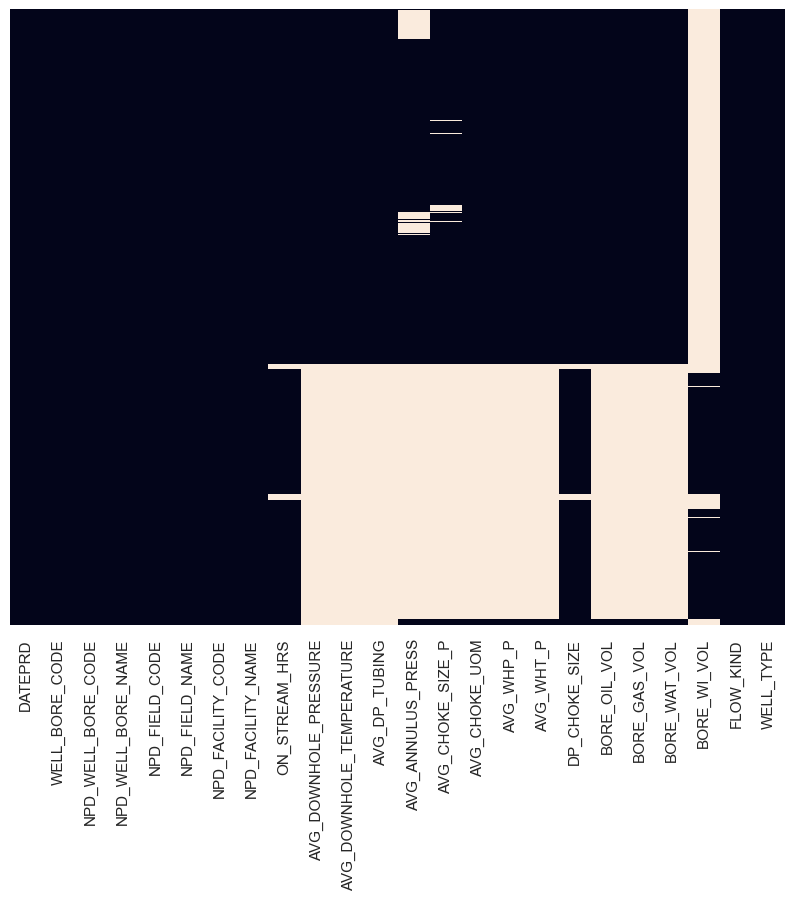

In [236]:
# рассмотрим таблицу на факт пропущенных значений
# пропущено достаточно много значений, но пока нельзя сделать выводы о том, что имеются некачественные данные
# отфильтруем данные и рассмотрим данные далее
A= sns.heatmap(df_production.isnull(),yticklabels=False,cbar=False)

## (3) Process 

Очистим данные. Удалим те столбцы, которые не требуются.

In [237]:
# доступные типы скважин
# WI - нагнетательные, OP - добывающие
df_production['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

In [238]:
# данные по каким всего скважинам отображены
# как видно, собраны данные по 7 скважинам
df_production['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

In [239]:
# id только добывающих скважин
df_production[df_production['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5769], dtype=int64)

In [240]:
# датафрейфм только с добывающими скважинами
df_prod = df_production[df_production['WELL_TYPE'] == 'OP']

In [241]:
# немного очистим данные, удалив столбцы с названиями, типом скважины и т.д., поскольку ранее уже были взяты требуемые скважины
df_prod = df_prod.drop(labels=['NPD_WELL_BORE_NAME',
                         'NPD_FIELD_CODE',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE',
                        'WELL_BORE_CODE'], axis=1)

In [242]:
df_prod

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE   
1     2014-04-08                7405            0.0                    NaN  \
2     2014-04-09                7405            0.0                    NaN   
3     2014-04-10                7405            0.0                    NaN   
4     2014-04-11                7405            0.0              310.37614   
5     2014-04-12                7405            0.0              303.50078   
...          ...                 ...            ...                    ...   
15628 2016-09-13                5769            0.0                    NaN   
15629 2016-09-14                5769            0.0                    NaN   
15630 2016-09-15                5769            0.0                    NaN   
15631 2016-09-16                5769            0.0                    NaN   
15632 2016-09-17                5769            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS   
1                           NaN            NaN            0.00000  \
2                           NaN            NaN            0.00000   
3                           NaN            NaN            0.00000   
4                      96.87589      277.27826            0.00000   
5                      96.92339      281.44744            0.00000   
...                         ...            ...                ...   
15628                       NaN            NaN            0.28463   
15629                       NaN            NaN            0.27272   
15630                       NaN            NaN            0.28686   
15631                       NaN            NaN            0.28604   
15632                       NaN            NaN            0.27212   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   
1              1.003059    0.00000    0.00000        0.00000           0.0  \
2              0.979008    0.00000    0.00000        0.00000           0.0   
3              0.545759    0.00000    0.00000        0.00000           0.0   
4              1.215987   33.09788   10.47992       33.07195           0.0   
5              3.087015   22.05334    8.70429       22.05334           0.0   
...                 ...        ...        ...            ...           ...   
15628          0.673718    0.08545    0.22889        0.03741           0.0   
15629          0.636088    0.07776    0.22879        0.01862           0.0   
15630          0.670794    0.08545    0.22914        0.00631           0.0   
15631          0.664393    0.08544    0.22896        0.01181           0.0   
15632          0.624660    0.07497    0.22846        0.02576           0.0   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
1               0.0           0.0          NaN  
2               0.0           0.0          NaN  
3               0.0           0.0          NaN  
4               0.0           0.0          NaN  
5               0.0           0.0          NaN  
...             ...           ...          ...  
15628           0.0           0.0          NaN  
15629           0.0           0.0          NaN  
15630           0.0           0.0          NaN  
15631           0.0           0.0          NaN  
15632           0.0           0.0          NaN  

[9143 rows x 15 columns]

## Analyze

<Axes: >

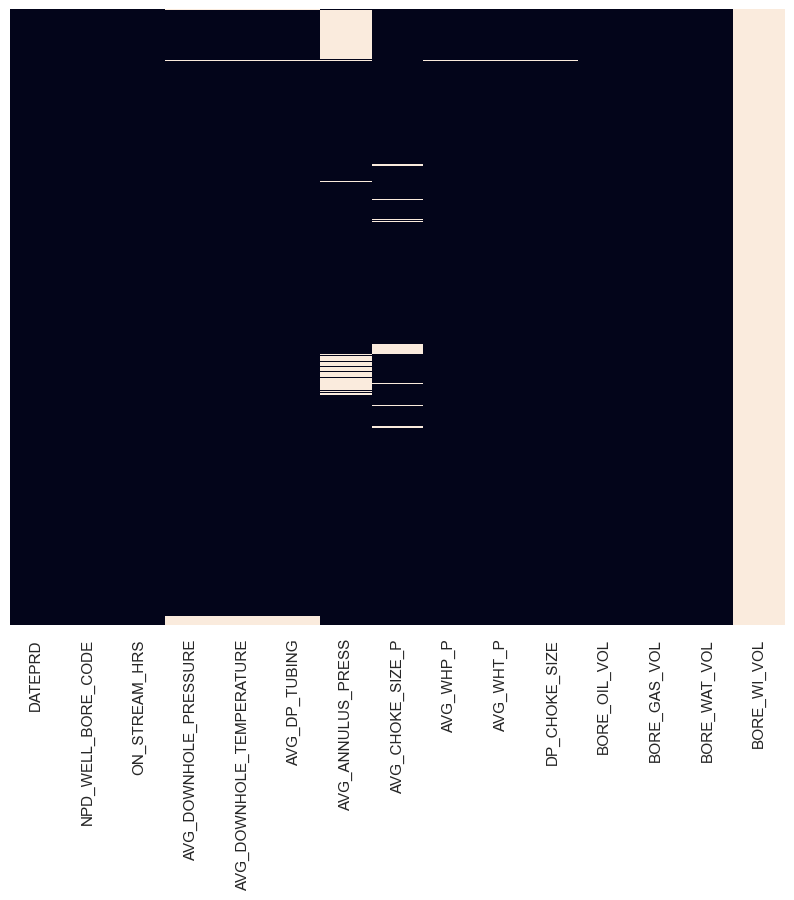

In [243]:
# Преобразовав датафрейм, посмотрим снова на пропущенные значения
sns.heatmap(df_prod.isnull(),yticklabels=False,cbar=False)

Как видно из графика выше, BORE_WI_VOL для всех скважин принимает пропущенные значения

BORE_WI_VOL - объём закачиваемой воды

Это вытекает из того, что мы взяли только добывающие скважины, закачка воды у которых отсутствует 

In [244]:
df_prod['NPD_WELL_BORE_CODE'].value_counts()
# посчитаем, сколько строк данных известно для каждой скважины
# видно, что количество данных разнится

NPD_WELL_BORE_CODE
5599    3056
5351    3056
7078    1165
7289     978
7405     744
5769     144
Name: count, dtype: int64

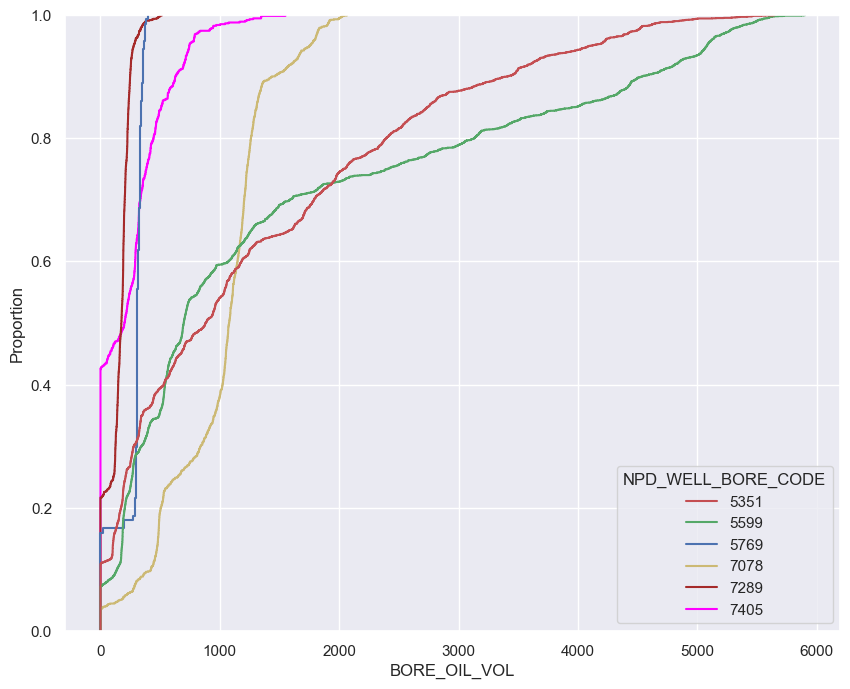

In [245]:
# построим функцию распределения добычи флюида скважинами
sns.ecdfplot(x='BORE_OIL_VOL',data=df_prod, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])

plt.show()

Из этого графика можно сделать следующие выводы:
1) У скважины 7405 около 40% добываемого флюида пришлось на нулевую добычу нефти.
    Для скважины 7289 - чуть больше 20%
    Чуть меньше 20% - 5769.

2) Кроме того, на этих скважинах суммарная полезная добыча значительно меньше, чем на других скважинах. 

3) Данных по этим скважинам меньше всего

При подготовке обучения модели прогнозирования добычи следует исключить эти скважины для более точных результатов

#### ЗАКАЧИВАЕМАЯ ВОДА ОТСУТСТВУЕТ. ВСЕ РАССМАТРИВАЕМЫЕ СКВАЖИНЫ - ДОБЫВАЮЩИЕ


In [246]:
## построим точечный график зависимости добычи от времени.
## Видно, что скважины 7405,  5769, 7289 имеют самый незначительный объём добычи
df_prod["NPD_WELL_BORE_CODE"] = df_prod["NPD_WELL_BORE_CODE"].astype(str)
fig = px.scatter(df_prod, x="DATEPRD", y="BORE_OIL_VOL",
                 color="NPD_WELL_BORE_CODE",
                width=1200, height=720)
fig.show()

In [247]:
fig = px.line(df_prod, x="DATEPRD", y="BORE_OIL_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

Рассмотрим график выше:

1) наибольшая добыча приходится на скважины 5351 и 5599

2) периодически добыча опускается до нуля. Можно сделать вывод, что скважины регулярно останавливались

3) Графики добычи нефти постепенно опускаются до нуля, скважины истощаются

In [248]:
# рассмотрим объём добываемой с нефтью воды
# на графике есть пара экстремальных значений
# скорее всего, это выбросы данных, которые следует исключить из рассмотрения
fig = px.line(df_prod, x="DATEPRD", y="BORE_WAT_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [249]:
# рассчитаем обводнённость с имеющимися данными
df_prod['BORE_WAT_VOL'] = df_prod.query('BORE_WAT_VOL < 8000')['BORE_WAT_VOL']
df_prod['water_cut'] =  df_prod['BORE_WAT_VOL'] / (df_prod['BORE_OIL_VOL'] + df_prod['BORE_WAT_VOL'])


In [250]:
# построим график обводнённости
# видно, что графики стремятся к 1, большинство добываемого флюида к концу периода данных - вода
fig = px.line(df_prod.query('water_cut >= 0'), x="DATEPRD", y='water_cut', color='NPD_WELL_BORE_CODE')
fig.show()

In [251]:
# динамика добычи газа
# скв. 5599 и 5351 так же имеют наибольшую добычу
fig = px.line(df_prod, x="DATEPRD", y="BORE_GAS_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

<Axes: >

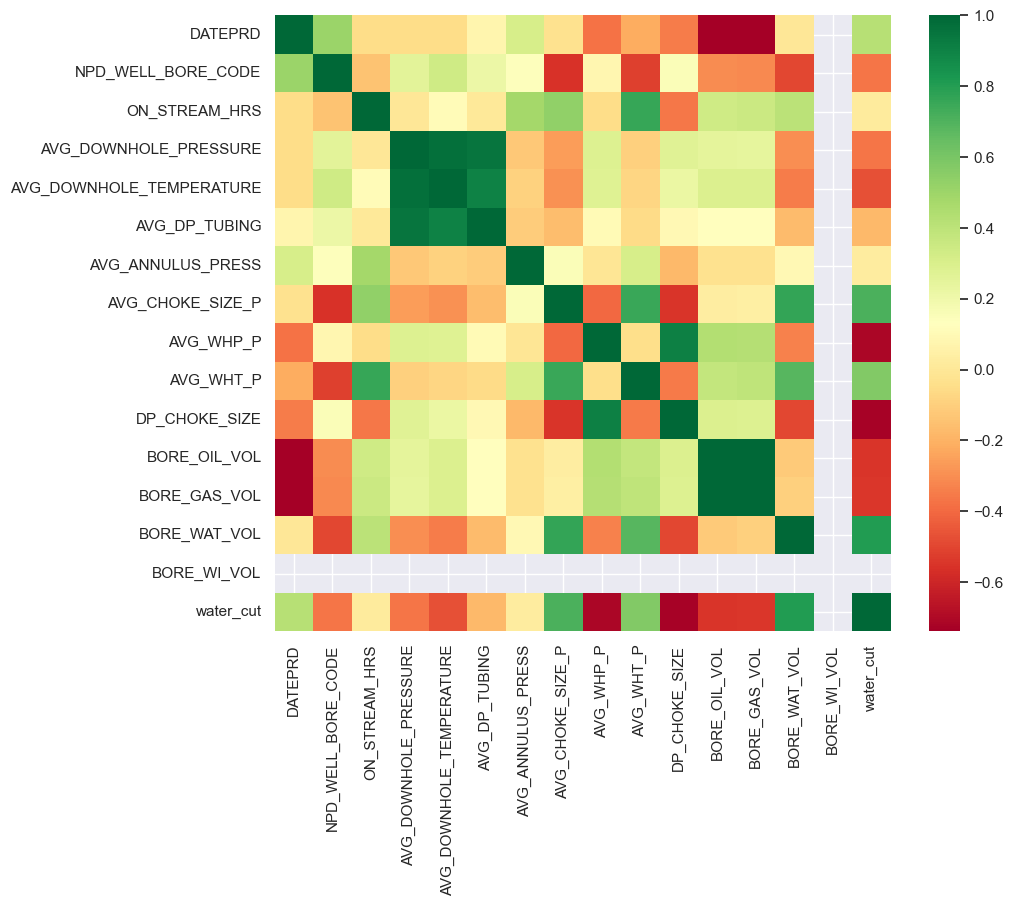

In [252]:
# найдём корреляцию между предоставленными нам данными
sns.heatmap(df_prod.corr(),square=True,cmap='RdYlGn')

In [253]:
df_prod.corr()

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS   
DATEPRD                   1.000000            0.510558      -0.046454  \
NPD_WELL_BORE_CODE        0.510558            1.000000      -0.144309   
ON_STREAM_HRS            -0.046454           -0.144309       1.000000   
AVG_DOWNHOLE_PRESSURE    -0.047610            0.257847      -0.003561   
AVG_DOWNHOLE_TEMPERATURE -0.051204            0.339859       0.105492   
AVG_DP_TUBING             0.070323            0.218706       0.002273   
AVG_ANNULUS_PRESS         0.308461            0.142352       0.481910   
AVG_CHOKE_SIZE_P         -0.025854           -0.559442       0.531646   
AVG_WHP_P                -0.377659            0.077635      -0.050390   
AVG_WHT_P                -0.220701           -0.521355       0.762012   
DP_CHOKE_SIZE            -0.350741            0.150984      -0.362432   
BORE_OIL_VOL             -0.736893           -0.308082       0.340889   
BORE_GAS_VOL             -0.738787           -0.311241       0.352557   
BORE_WAT_VOL             -0.000513           -0.494756       0.403983   
BORE_WI_VOL                    NaN                 NaN            NaN   
water_cut                 0.417266           -0.365441       0.020540   

                          AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE   
DATEPRD                               -0.047610                 -0.051204  \
NPD_WELL_BORE_CODE                     0.257847                  0.339859   
ON_STREAM_HRS                         -0.003561                  0.105492   
AVG_DOWNHOLE_PRESSURE                  1.000000                  0.967823   
AVG_DOWNHOLE_TEMPERATURE               0.967823                  1.000000   
AVG_DP_TUBING                          0.949724                  0.898936   
AVG_ANNULUS_PRESS                     -0.124409                 -0.087568   
AVG_CHOKE_SIZE_P                      -0.263167                 -0.296143   
AVG_WHP_P                              0.283107                  0.273981   
AVG_WHT_P                             -0.095601                 -0.077270   
DP_CHOKE_SIZE                          0.267537                  0.221859   
BORE_OIL_VOL                           0.248484                  0.289763   
BORE_GAS_VOL                           0.245889                  0.287268   
BORE_WAT_VOL                          -0.298040                 -0.344862   
BORE_WI_VOL                                 NaN                       NaN   
water_cut                             -0.370514                 -0.468055   

                          AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P   
DATEPRD                        0.070323           0.308461         -0.025854  \
NPD_WELL_BORE_CODE             0.218706           0.142352         -0.559442   
ON_STREAM_HRS                  0.002273           0.481910          0.531646   
AVG_DOWNHOLE_PRESSURE          0.949724          -0.124409         -0.263167   
AVG_DOWNHOLE_TEMPERATURE       0.898936          -0.087568         -0.296143   
AVG_DP_TUBING                  1.000000          -0.110851         -0.162517   
AVG_ANNULUS_PRESS             -0.110851           1.000000          0.151405   
AVG_CHOKE_SIZE_P              -0.162517           0.151405          1.000000   
AVG_WHP_P                      0.102101          -0.006081         -0.402076   
AVG_WHT_P                     -0.055072           0.313898          0.753582   
DP_CHOKE_SIZE                  0.093112          -0.179594         -0.552932   
BORE_OIL_VOL                   0.126817          -0.026276          0.029062   
BORE_GAS_VOL                   0.125322          -0.029502          0.039070   
BORE_WAT_VOL                  -0.172674           0.093171          0.763245   
BORE_WI_VOL                         NaN                NaN               NaN   
water_cut                     -0.177151           0.024803          0.708117   

                          AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   
DATEPRD                   -0.377659

# # Итог

Был проведён эксплораторный анализ данных по месторождениям с Норвежского континентального шельфа (NCS).

Исследование показывает снижение величины добычи нефти для всех скважин, а для незначительных по сравнению с другими скважин объем добытой нефти относительно, но в то же время объем добычи воды увеличился, что делает их экономически нецелесообразными.

Как видно из графиков, добыча на всех скважинах снижалась, в конце рассматриваемого периода добыча полностью прекратилась.

## P.S.
Данные были очищены и рассмотрены на факт наличия выбросов данных. При необходимости можно попробовать обучить модель машинного обучения прогнозировать добычу флюида, обводнённость и пр.

## Герасимчук Георгий, @georg_ger

# Чут-чут мл
## напишем модель, определяющую обводненность по введенным пластовым и скважинным параметрам

 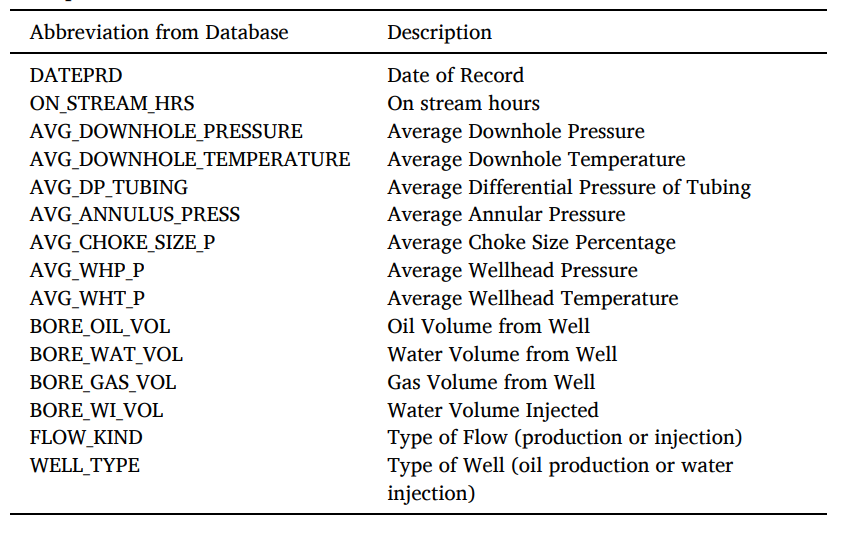

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [255]:
df_train = df_prod.drop(labels=['NPD_WELL_BORE_CODE', 'ON_STREAM_HRS', 'AVG_ANNULUS_PRESS', 'BORE_WI_VOL'], axis=1)

In [256]:
df_train = df_train.query('water_cut >= 0')

In [257]:
df_train.shape

(7995, 12)

In [258]:
df_train.describe()

DATEPRD  AVG_DOWNHOLE_PRESSURE   
count                           7995            7859.000000  \
mean   2013-04-24 17:19:47.392120064             181.523327   
min              2008-02-12 00:00:00               0.000000   
25%              2011-03-14 00:00:00             197.116362   
50%              2014-01-29 00:00:00             230.193390   
75%              2015-05-08 00:00:00             251.864142   
max              2016-09-17 00:00:00             308.055940   
std                              NaN             105.238644   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_CHOKE_SIZE_P    AVG_WHP_P   
count               7859.000000    7859.000000       7995.000000  7992.000000  \
mean                  78.934216     153.884464         61.219126    45.242033   
min                    0.000000       0.000000          0.327053     0.000000   
25%                   99.375915     148.870295         33.717595    31.949926   
50%                  104.992976     176.185471         59.231621    38.187874   
75%                  106.386618     203.910603        100.000000    54.976785   
max                  108.502178     259.087354        100.000000   120.888576   
std                   45.071064      70.853596         33.704618    18.961082   

         AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL   
count  7992.000000    7992.000000   7995.000000    7995.000000   7995.000000  \
mean     76.059053      16.185970   1252.763049  184150.195012   1913.967731   
min       0.000000       0.000000      0.000000       7.090000      0.000000   
25%      71.284556       3.356822    271.850000   41941.950000    170.070000   
50%      81.890252       8.786382    716.150000  111443.170000   1483.320000   
75%      88.442284      24.010732   1651.085000  251333.335000   3410.460000   
max      93.509584     106.035140   5901.840000  851131.520000   6391.890000   
std      17.703800      17.376540   1342.925370  190122.047910   1692.102124   

         water_cut  
count  7995.000000  
mean      0.536244  
min       0.000000  
25%       0.158811  
50%       0.638543  
75%       0.850006  
max       1.000000  
std       0.343327

In [259]:
df_train.isna().sum()

DATEPRD                       0
AVG_DOWNHOLE_PRESSURE       136
AVG_DOWNHOLE_TEMPERATURE    136
AVG_DP_TUBING               136
AVG_CHOKE_SIZE_P              0
AVG_WHP_P                     3
AVG_WHT_P                     3
DP_CHOKE_SIZE                 3
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
water_cut                     0
dtype: int64

In [260]:
# Есть пропущенные значения. Попробуем создать модель, которая заполнит пропущенные значения на основе имеющихся данных
# нужно заполнить забойное давление и температуру

In [261]:
from sklearn.impute import KNNImputer

In [262]:
# Выбор данных по давлениям, где есть пропуски
# Воспользуемся методом k-ближайших соседей (KNN)
df_train = df_train.drop('DATEPRD', axis = 1)

In [263]:
# Инициализация KNNImputer с 5 соседями
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_train)

In [264]:
# без nan-ов
df_imputed = pd.DataFrame(df_imputed, columns = df_train.columns)

In [265]:
df_train = df_imputed

In [266]:
# выбор X и Y
x = df_train[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_WHT_P', 'AVG_WHP_P','BORE_OIL_VOL','BORE_WAT_VOL', 'BORE_GAS_VOL']]
y = df_train['water_cut']

In [267]:
#Разделим данные на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [268]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [269]:
y_pred = model.predict(X_test)

In [270]:
# Оценка точности модели с использованием MSE (среднеквадратичной ошибки) и коэффициента детерминации R²:# 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 0.006542171488139972
R²: 0.9441186006446614


In [271]:
print(y_pred)

[0.75229016 0.72496885 0.94883996 ... 0.37599004 0.12030141 0.9776424 ]
